<a href="https://colab.research.google.com/github/Yilder02/SyS_2023/blob/main/Parcial1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II
#Profesor: Andrés Marino Álvarez Meza, Ph.D.
#Departamento de Ingeniería Eléctrica, Electrónica, y Computación
#Universidad Nacional de Colombia - sede Manizales
# Estudiante: Yilder Rafael Epiayu Gonzalez
# CC: 1006817066

#Pregunta 1 (valor 2.5 puntos):Proceso de digitalización incluyendo al menos 3 ciclos de la señal x(t)

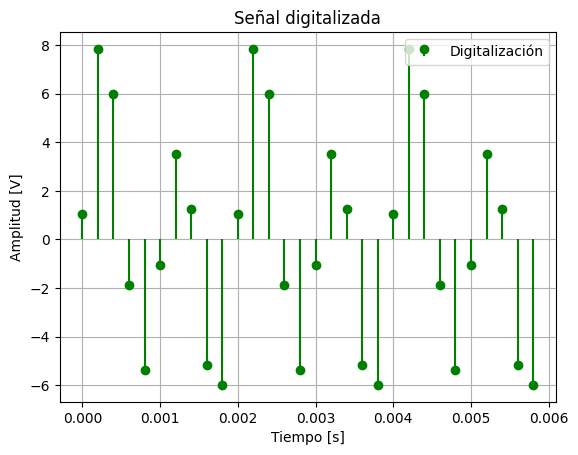

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f1, f2, f3 = 500, 1000, 5500  # Frecuencias en Hz
A1, A2, A3 = 0.3, 0.6, 0.1    # Amplitudes
phi1, phi2, phi3 = -np.pi/4, 0, -np.pi  # Fases
t_max = 3 / f1  # Duración: al menos 3 ciclos del componente más lento (500 Hz)
fs = 5000  # Frecuencia de muestreo (5 kHz)
nm=10 #numero de muestras
# Tiempo continuo
t = np.linspace(0, t_max, int(fs * t_max * nm))  # Resolución alta para señal continua

# Señal continua x(t)
x_t = (A1 * np.cos(2 * np.pi * f1 * t + phi1) +
       A2 * np.sin(2 * np.pi * f2 * t + phi2) +
       A3 * np.cos(2 * np.pi * f3 * t + phi3))


#Acondicionamiento:funcion del cero y pendiente
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x_t, ymin, ymax)

# Muestreo(Discretizar)
n = np.arange(0, int(fs * t_max))  # Índices de tiempo discreto
t_dis = n / fs  # Tiempos discretos
k=10 #factor de escalamiento
x_dis = k * (A1 * np.cos(2 * np.pi * f1 * t_dis + phi1) +
                  A2 * np.sin(2 * np.pi * f2 * t_dis + phi2) +
                  A3 * np.cos(2 * np.pi * f3 * t_dis + phi3))

# Digitalización (cuantización)
N_bits = 5
N_levels = 2**N_bits
Delta = (ymax - ymin) / N_levels  # Paso de cuantización
x_dig = np.round((x_dis - ymin) / Delta) * Delta + ymin

# Gráfica
# Señal digitalizada
plt.stem(t_dis, x_dig, linefmt='g-', markerfmt='go', basefmt=" ", label="Digitalización")
plt.title("Señal digitalizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()
plt.legend()

plt.show()


# Conversor adecuado para la señal x(t), y graficas de la señal continua, discreta y digital.

Frecuencia de muestreo 11500 Hz es adecuada para la señal.


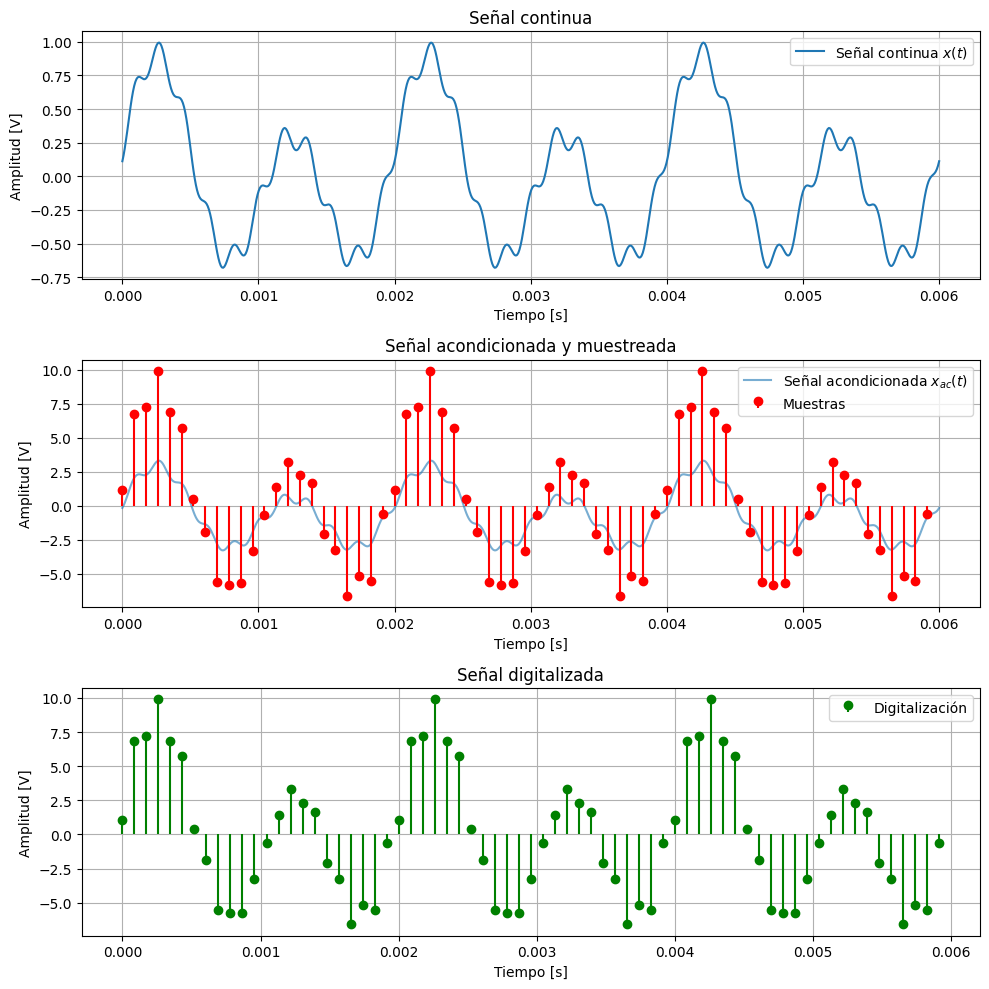

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función que verifica si la frecuencia de muestreo es apropiada según el criterio de Nyquist
def verificar_fs(f_max, fs):
    if fs < 2 * f_max:
        return False  # Frecuencia de muestreo no adecuada
    return True  # Frecuencia de muestreo adecuada

# Función para digitalizar la señal
def conversor_A_D(f1, f2, f3, A1, A2, A3, phi1, phi2, phi3, fs, N_bits, V_min, V_max):
    # Parámetros de la señal
    t_max = 3 / f1  # Duración: al menos 3 ciclos del componente más lento (500 Hz)

    # Tiempo continuo
    nm=10 #numero de muestras
    t = np.linspace(0, t_max, int(fs * t_max * nm))  # Resolución alta para señal continua

    # Señal continua x(t)
    x_t = (A1 * np.cos(2 * np.pi * f1 * t + phi1) +
           A2 * np.sin(2 * np.pi * f2 * t + phi2) +
           A3 * np.cos(2 * np.pi * f3 * t + phi3))

    # Verificación de la frecuencia de muestreo
    f_max = max(f1, f2, f3)  # Frecuencia máxima de la señal
    if not verificar_fs(f_max, fs):
        print(f"¡ADVERTENCIA!: La frecuencia de muestreo {fs} Hz "
              "es inapropiada para la señal.")
    else:
        print(f"Frecuencia de muestreo {fs} Hz es adecuada para la señal.")

    # Acondicionamiento:
    xcp = my_ceropen(x_t, ymin, ymax)

    # Muestreo
    n = np.arange(0, int(fs * t_max))  # Índices de tiempo discreto
    t_discreto = n / fs  # Tiempos discretos
    x_discreto = k * (A1 * np.cos(2 * np.pi * f1 * t_discreto + phi1) +
                      A2 * np.sin(2 * np.pi * f2 * t_discreto + phi2) +
                      A3 * np.cos(2 * np.pi * f3 * t_discreto + phi3))

    # Digitalización (cuantización)
    N_levels = 2**N_bits  # Niveles de cuantización
    Delta = (V_max - V_min) / N_levels  # Paso de cuantización
    x_digital = np.round((x_discreto - V_min) / Delta) * Delta + V_min

    # Graficar las señales
    plt.figure(figsize=(10, 10))

    # Señal continua
    plt.subplot(3, 1, 1)
    plt.plot(t, x_t, label="Señal continua $x(t)$")
    plt.title("Señal continua")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid()
    plt.legend()

    # Señal acondicionada y muestreada
    plt.subplot(3, 1, 2)
    plt.plot(t, xcp, label="Señal acondicionada $x_{ac}(t)$", alpha=0.6)
    plt.stem(t_discreto, x_discreto, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras")
    plt.title("Señal acondicionada y muestreada")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid()
    plt.legend()

    # Señal digitalizada
    plt.subplot(3, 1, 3)
    plt.stem(t_discreto, x_digital, linefmt='g-', markerfmt='go', basefmt=" ", label="Digitalización")
    plt.title("Señal digitalizada")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parámetros de la señal
f1, f2, f3 = 500, 1000, 5500  # Frecuencias en Hz
A1, A2, A3 = 0.3, 0.6, 0.1    # Amplitudes
phi1, phi2, phi3 = -np.pi/4, 0, -np.pi  # Fases

# Parámetros de entrada
fs = 11500 # Frecuencia de muestreo (ejemplo fs>2*f3)
N_bits = 5  # Número de bits
V_min = -3.3  # Rango de entrada análoga
V_max = 3.3

# Llamar a la función para generar el conversor y graficar
conversor_A_D(f1, f2, f3, A1, A2, A3, phi1, phi2, phi3, fs, N_bits, V_min, V_max)


#Pregunta 2 (valor 2.5 puntos):Analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo.

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 03:19:04--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.113, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 03:19:04--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s      

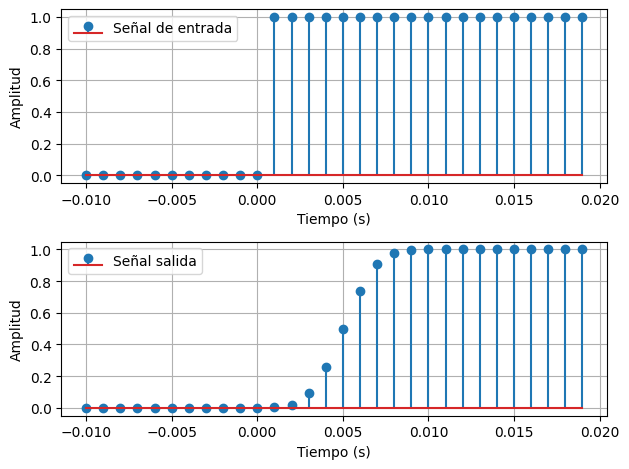

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

# Verificar linealidad: superposicion y escalamiento(le relacion se rige por operaciones lineales).

In [ ]:
# Definir señales
signal_u1 = np.heaviside(t - 0.005, 1)  # Heaviside desplazada
signal_u2 = np.heaviside(t + 0.005, 1)  # Heaviside desplazada en otra dirección

# Salida del sistema para cada señal
y_u1 = my_system.predict(signal_u1)
y_u2 = my_system.predict(signal_u2)

# Suma de las señales
signal_comb = signal_u1 + signal_u2
y_comb = my_system.predict(signal_comb)

# Verificar aditividad
print("Comprobación de aditividad:")
print(np.allclose(y_comb, y_u1 + y_u2))  # Debería devolver True si es lineal

# Escalar la señal
a = 2
signal_scaled = a * signal_u

# Salida del sistema para la señal escalada
y_scaled = my_system.predict(signal_scaled)

# Verificar escalabilidad
print("Comprobación de escalabilidad:")
print(np.allclose(y_scaled, a * y_u))  # Debería devolver True si es lineal


Comprobación de aditividad:
True
Comprobación de escalabilidad:
True


#Verificar SLIT: se verifica si un desplazamiento en el tiempo de la entrada provoca un desplazamiento equivalente en la salida.

Comprueba si el sistema satisface la propiedad de invariancia en el tiempo, es decir:

$y_s(t)=y(t−t_0)$

* Desplaza temporalmente la señal de entrada.
* Calcula la salida del sistema para la señal desplazada.
* Compara si la salida desplazada es igual a la salida de la señal original desplazada.

In [ ]:
# Desplazar la señal en el tiempo
to = 0.0001 # Tiempo de desplazamiento (NOTA: si coloco un to>0.0001 me da falso)
s_shifted = np.heaviside(t - to, 1)

# Salida del sistema para la señal desplazada
y_shifted = my_system.predict(s_shifted)

# Desplazar la salida de la señal original
y_ori_shifted = np.roll(y_u, int(to * fs))  # Desplazamos la salida original

# Verificar invariancia en el tiempo
print("Comprobación de invariancia en el tiempo:")
print(np.allclose(y_shifted, y_ori_shifted,1e-5))  # Debería devolver True si es invariante


Comprobación de invariancia en el tiempo:
True


#Se determina su respuesta al impulso y se utiliza esta respuesta para calcular la salida del sistema ante la siguiente señal: $x[n]=sin[100πn]+sin[600πn]$

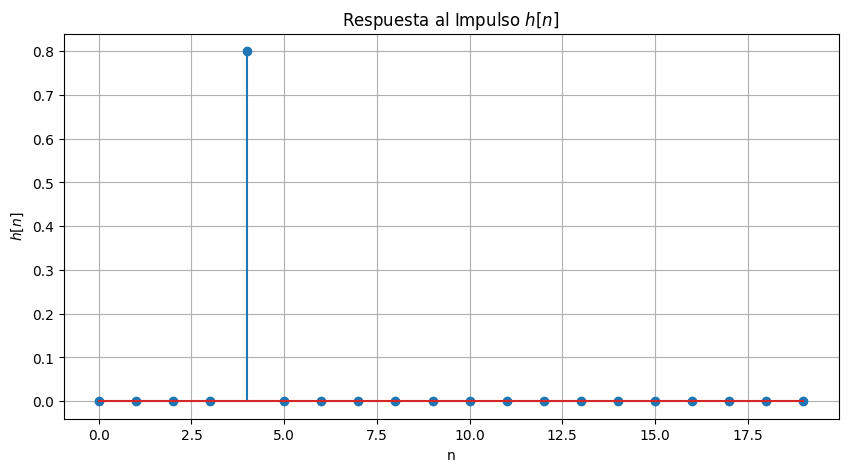

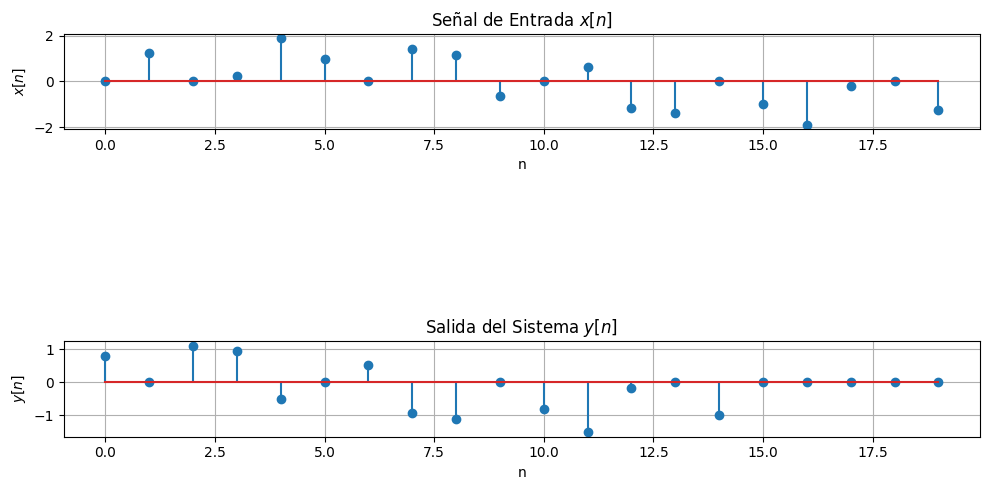

In [ ]:
# Parámetros del sistema
fs = 1000  # Frecuencia de muestreo en Hz
num_samples = 20  # Número de muestras para análisis

# Simulación del sistema como caja negra
def sistema(signal):
    """Simula un sistema desconocido."""
    # Simulación arbitraria: desplazamiento + atenuación para demostrar
    return 0.8 * np.roll(signal, 4)

# Generar señal impulso
n_impulse = np.arange(0, num_samples)  # Rango discreto
delta = np.zeros(num_samples)
delta[0] = 1  # Impulso en el primer elemento

# Obtener la respuesta al impulso h[n]
h_n = sistema(delta)

# Graficar la respuesta al impulso
plt.figure(figsize=(10, 5))
plt.stem(n_impulse, h_n)
plt.title("Respuesta al Impulso $h[n]$")
plt.xlabel("n")
plt.ylabel("$h[n]$")
plt.grid()
plt.show()

# Generar la señal de entrada x[n] = sin(100πn) + sin(600πn)
n = np.arange(0, num_samples)  # Rango de muestras
x_n = np.sin(100 * np.pi * n / fs) + np.sin(600 * np.pi * n / fs)  # Señal de entrada

# Calcular la salida del sistema usando convolución
y_n = np.convolve(x_n, h_n, mode='same') #(mode='same')misma llongitud que la señal de entrada mas larga

# Graficar señales
plt.figure(figsize=(10, 5))

# Señal de entrada
plt.subplot(3, 1, 1)
plt.stem(n, x_n)
plt.title("Señal de Entrada $x[n]$")
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.grid()

# Salida del sistema
plt.subplot(3, 1, 3)
plt.stem(n, y_n[:len(n)])
plt.title("Salida del Sistema $y[n]$")
plt.xlabel("n")
plt.ylabel("$y[n]$")
plt.grid()

plt.tight_layout()
plt.show()


#PREGUNTAS O CONSULTAS A LA IA
* ¿Cómo se puede desplazar la señal en el tiempo para comprobar la invariancia temporal de un sistema en Python?
* ¿Cómo puedo verificar si un sistema es lineal y cumple con la propiedad de invarianza en el tiempo utilizando simulaciones?
* ¿Cómo ajusto el tamaño del gráfico para que se vea correctamente?
* ¿Cómo realizo la convolución de dos señales en Python?
* ¿Cómo uso la función convolve de NumPy para calcular la convolución de señales en Python?